In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from EpiModel import *

In [3]:
# Asymptomatic individuals are often less infectious than those displaying symptoms by some fraction rbeta
rbeta = 0.75

# A fraction pₐ of all of those Exposed
pa = 0.4

R0 = 2.0
epsilon = 0.4
mu = 0.1

beta = R0*mu/(pa*rbeta+(1-pa))

SEIIR = EpiModel()
SEIIR.add_interaction('S', 'E', 'Ia', rbeta*beta)
SEIIR.add_interaction('S', 'E', 'Is', beta)
SEIIR.add_spontaneous('E', 'Ia', epsilon*pa)
SEIIR.add_spontaneous('E', 'Is', epsilon*(1-pa))
SEIIR.add_spontaneous('Ia', 'R', mu)
SEIIR.add_spontaneous('Is', 'R', mu)

In [9]:
# Number of population
N = 100000
# Initial number of Asymptomatic
I0 = 10

In [10]:
SEIIR.integrate(365, S=N-I0, Ia=0, Is=I0, E=0, R=0)

Text(0, 0.5, 'Population')

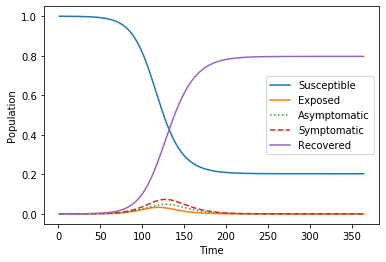

In [29]:
fig,ax = plt.subplots(1)
# fig= plt.figure(figsize=(15,6))
(SEIIR.S/N).plot( linestyle='-', label='Susceptible', ax=ax)
(SEIIR.E/N).plot(linestyle='-', label='Exposed', ax=ax)
(SEIIR.Ia/N).plot( linestyle=':', label='Asymptomatic', ax=ax)
(SEIIR.Is/N).plot( linestyle='--', label='Symptomatic', ax=ax)
(SEIIR.R/N).plot( linestyle='-', label='Recovered', ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

In [21]:
SEIIR.R/N

1      0.000000
2      0.000010
3      0.000019
4      0.000029
5      0.000039
         ...   
360    0.796851
361    0.796851
362    0.796851
363    0.796851
364    0.796851
Name: R, Length: 364, dtype: float64

Text(0, 0.5, 'Population')

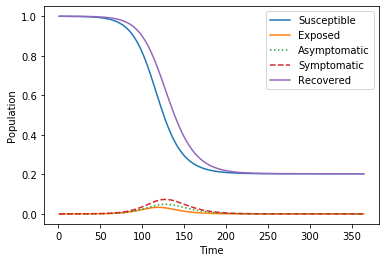

In [31]:
fig,ax = plt.subplots(1)
# fig= plt.figure(figsize=(15,6))
(SEIIR.S/N).plot( linestyle='-', label='Susceptible', ax=ax)
(SEIIR.E/N).plot(linestyle='-', label='Exposed', ax=ax)
(SEIIR.Ia/N).plot( linestyle=':', label='Asymptomatic', ax=ax)
(SEIIR.Is/N).plot( linestyle='--', label='Symptomatic', ax=ax)
(1-SEIIR.R/N).plot( linestyle='-', label='Recovered', ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

Text(0, 0.5, 'Population')

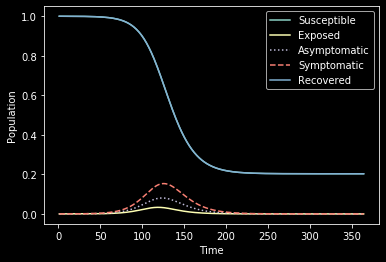

In [78]:
Sy, Ey, Iay, Isy, Ry = SEIIR.S/N, SEIIR.E/N, SEIIR.Ia/N, SEIIR.Is/N, SEIIR.R/N

Ef = Ey
Iaf = Iay+Ey
Isf = Isy+Iaf
Sf = Sy+Isf

fig,ax = plt.subplots(1)
# fig= plt.figure(figsize=(15,6))
(Sf).plot( linestyle='-', label='Susceptible', ax=ax)
ax.set_ylabel('between y1 and 0')
(Ef).plot(linestyle='-', label='Exposed', ax=ax)
(Iaf).plot( linestyle=':', label='Asymptomatic', ax=ax)
(Isf).plot( linestyle='--', label='Symptomatic', ax=ax)
(1-SEIIR.R/N).plot( linestyle='-', label='Recovered', ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

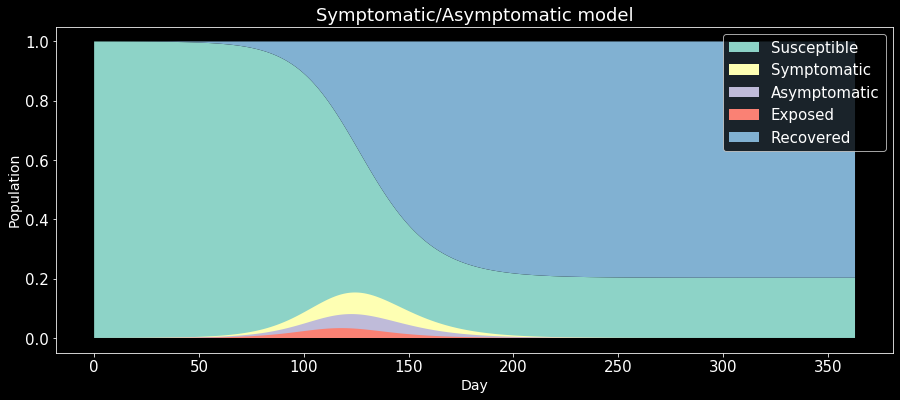

In [77]:
fig= plt.figure(figsize=(15,6))
plt.style.use('dark_background')
plt.fill_between(t, 0, Sf,  label='Susceptible')
plt.fill_between(t, 0, Isf,  label='Symptomatic')
plt.fill_between(t, 0, Iaf,  label='Asymptomatic')
plt.fill_between(t, 0, Ef,  label='Exposed')
plt.fill_between(t, 1-SEIIR.R/N,1,  label='Recovered')
plt.legend(prop={"size":15})

plt.title("Symptomatic/Asymptomatic model", fontsize=18)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.tick_params(labelsize=15);